# Algoritmo de búsqueda de profundidad limitada

El lagoritmo de primero en profundidad tiene el problema que, aunque encuentre la solución, no sea la solución óptima pues buscará intensivamente por un camino maximizando la profundidad del árbol. Esto también implica que puede tardarse demasiado en converger. Para solventar esto, se propone el algoritmo de búsqueda de profundidad limitada, el cual definirá un máximo de profundidad sobre la que va a buscar el algoritmo. Esta profundidad máxima limitará la búsqueda en profundidad y, por tanto, limitará también la longitud de una solución encontrada.

Planteamos aquí la aplicación del algoritmo de búsqueda de profundidad limitada para el problema del laberinto.

### Creación del problema del laberinto

Creamos el problema del laberinto como lo hemos venido haciendo:

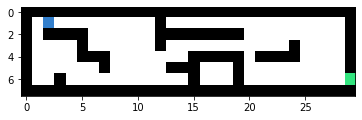

In [1]:
from maze_simulator import Maze

mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""

ent = Maze(mapa)
ent.draw()

### Pila y nodos

Como se trata de una búsqueda en profundida, utilizaremos una pila LIFO (Last-In-First-Ou) que permitirá expandir primero los nodos que entran al último a la pila y que corresponden a los nodos de mayor profundidad. Asimismo, creamos el objeto nodo, tomando en cuenta la profundidad de éstos, pues el algoritmo de profundidad limitada necesita saber en qué profundidad se encuentra un nodo para no expandir más éstos.

In [2]:
class LIFOQueue(object):
    """Clase de una cola FIFO en los problemas de búsqueda"""
    def __init__(self):
        self.queue = []
    def __str__(self):
        return ' '.join([str(q) for q in self.queue])
    def isEmpty(self):
        return self.queue == []
    def push(self, element):
        self.queue.append(element)
    def pop(self):
        last_element = self.queue[-1]
        del self.queue[-1]
        return last_element
    
class Node(object):
    """Clase para crear nodos con sus atributos."""
    def __init__(self):
        self.state = (0,0)
        self.parent = None 
        self.action = None
        #Guarda la profundidad del nodo
        self.depth = 0
    def __str__(self):
        if self.parent == None:
            return "State: {}".format(self.state)
        else:
            return "State: {}, Action: {}, Parent: {}".format(self.state,self.action,self.parent.state)   
            
def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    s = node.state 
    for action in problem.actions(s):
        new_s = problem.result(s, action)        
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action
        new_node.depth = node.depth + 1
        yield new_node

### Algoritmo

El aloritmo de búsqueda de profundidad limitada se implementará de manera similar al algoritmo de primero en profundidad, pero pondremos una restricción: cuando el nodo se encuentra a una profundidad dada $l$ ya no expandirá más este nodo.

Si el algoritmo a expandido todos los nodos con profundidad menor a $l$ sin encontrar una solución, entonces mandará un mensaje de `cutoff` que indicará precisamente que el algoritmo no ha podido encontrar la solución (al menos a ese nivle de profundidad). En caso contrario, el algoritmo regresará la solución.

In [3]:
def DepthLimitedSearch(problem,l):
    """Algoritmo Depth-Limited Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial    
    #Frontera con cola de prioridad
    frontier = LIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}
    #resultado
    result = "failure"

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)
        
        if problem.is_goal(node.state):
            print("Se encontró solución")
            return nodes
        if node.depth > l:
            result = "cutoff"
        else:
            for child in expand(problem, node):
                state = child.state
                if state not in reached.keys():
                    reached[state] = child
                    frontier.push(child)
    
    return result

#### Aplicación del algoritmo al problema

En el problema del laberinto podemos escoger una profundidad pequeña, de tal forma que el algoritmo de profundidad limitada no pueda encontrar la solución, en este caso regresará `cutoff`, pues no ha podido encontrar la solución en esta profundidad.

In [4]:
tree_5 = DepthLimitedSearch(ent,l=10)
print(tree_5)

cutoff


Podemos encontrar una solición si escogemos un número más grande en el parámetro de la profundidad. Aunque si este número es muy grande, puede encontrarse una solución similar al de búsqueda de primero en profundidad.

In [5]:
tree = DepthLimitedSearch(ent,l=50)

Se encontró solución


Finalmente, podemos visualizar la solución encontrada por el algoritmo.

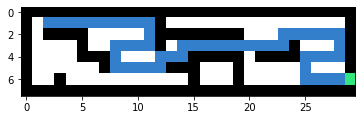

In [6]:
def get_path(search_tree, root):
    """Recupera la solución."""
    leaf = search_tree[::-1][0]
    parent = leaf.parent
    path = [leaf, parent]
    while parent.state != root:
        parent = parent.parent
        path.append(parent)
        
    return path[::-1]

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    
ent.draw()

El problema del algoritmo de búsqueda de profundidad limitada es que en muchos problemas no conocemos de principio la profundidad para hacer la búsqueda. Existen algunas propuestas para encontrar esta profundidad (como tomar el diametro de la gráfica del problema), entre ellas una de las más comunes es implementar el algoritmo de Búsqueda de profundidad iterativa.

# Algoritmo de búsqueda de profundidad iterativa

El algoritmo de búsqueda de profundidad iterative o <i>Iterative Deepening Search</i> es una adaptación del algoritmo de profundidad limitada, en donde se itera un contador sobre el parámetro de profundidad iterativa. Esto permite explorar diferentes profundidades hasta encontrar una solución en alguna de ellas.

El algoritmo comenzará con un contador de profundidad con $l=0$, donde $l$ es la profundidad, y enonces aplicará el algoritmo de profunidad limitado con este valor de profundidad. Si no se encuentra solución, entonces aumentará en 1 la profundidad para volver a aplicar el algoritmo de profundidad limitada. Este proceso se repetirá hasta que se encuentre la solución. De esta forma, este algoritmo garantiza encontrar una solución, aunque puede ser más costoso.

In [7]:
def IterativeDeepeningSearch(problem):
    """Algoritmo de Iterative Deepening Search."""
    #Inicializa la profundidad
    l = 0
    #Revisa si hay resultados
    result = DepthLimitedSearch(problem,l)
    #Itera hasta encontrar una solución
    while result == "cutoff":
        #Agrega una profundidad más
        l += 1
        #Revisa el resultado
        result = DepthLimitedSearch(problem,l)
    
    print("Resuelto en {} iteraciones".format(l))
    return result

#### Aplicación del algoritmo al problema

Aplicando el algoritmo de búsqueda de profundidad iterativa al problema del laberinto, podemos ver que se encuentra una soluión, y el algoritmo imprimirá la profundidad en que se encontró la solución.

Se encontró solución
Resuelto en 43 iteraciones


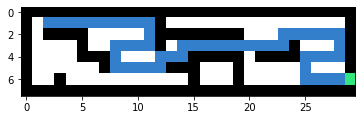

In [8]:
ent_it = Maze(mapa)
tree_it = IterativeDeepeningSearch(ent_it)

#Visualiza la solución
prev_s = ent_it.initial
for n in get_path(tree_it, ent_it.initial):
    ent_it.move(prev_s, n.state)
    prev_s = n.state
    
ent.draw()

Como se puede notar, la solución encontrada es incluso más corta que la que encontraba el algoritmo de profundidad limitada.